## 🐼 **Pandas Zoo** (R)

l contexto de análisis de datos que elegimos fue el de **visitas a un zoológico**. Para ello, crearemos cinco datasets en los que almacenaremos la siguiente información:

- **Entradas vendidas**
- **Hábitats disponibles para visitar**
- **Shows disponibles para visitar**
- **Relación entre entradas vendidas y visitas a hábitats**, incluyendo el nivel de satisfacción de dichas visitas
- **Relación entre entradas vendidas y visitas a shows**, también con sus respectivos niveles de satisfacción

Elegimos este contexto por el **potencial de análisis** que ofrece, ya que estos centros reciben grandes cantidades de personas. Identificar las **preferencias del público** permitiría **aumentar las ganancias** del zoológico, al manejar la oferta de servicios de acuerdo a estas.


## 📊 **Preguntas de investigación**

- ¿Qué días de la semana hay una mayor frecuencia de visitantes según cada rango etario?
- ¿En qué meses hay una mayor frecuencia de visitantes?
- ¿Existe alguna relación entre el tipo de ambiente de cada hábitat y la frecuencia de visitas?
- ¿La duración de los shows afecta la preferencia de los diferentes rangos etarios?
- ¿En qué horario se concentra la mayor cantidad de visitas?
- ¿La presencia de comercios en los hábitats afecta la satisfacción de los visitantes?
- ¿La posibilidad de consumir alimentos dentro de los hábitats influye en la cantidad de visitas?
- ¿Existe una correlación entre el porcentaje de cupos ocupados en los shows y el nivel de satisfacción de los visitantes?
- ¿Existe una correlación entre el tipo de entrada (VIP) y el nivel de satisfacción de los visitantes?
- ¿La adquisición de entradas VIP se relaciona con la asistencia a shows?
- ¿Existe una correlación entre la cantidad de especies en un hábitat y el número de visitas anuales?

## Objetivo
Aplicar las funcionalidades del legnuaje R a los datos obtenidos en la Unidad anterior y comparar la capacidad de análisis de datos con respecto a Pandas.

In [11]:
library(ggplot2)
library(dplyr)
library(lubridate)

entradas_limpio <- read.csv("./zoo_dataset/entradas_zoo_limpio.csv")
habitat_limpio <- read.csv("./zoo_dataset/habitats_generado.csv")
shows <- read.csv("./zoo_dataset/shows_generado.csv")
entradas_habitats_limpio <- read.csv("./zoo_dataset/visitas_habitats_limpio.csv")
entradas_shows_limpio <- read.csv("./zoo_dataset/visitas_shows_limpio.csv")


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




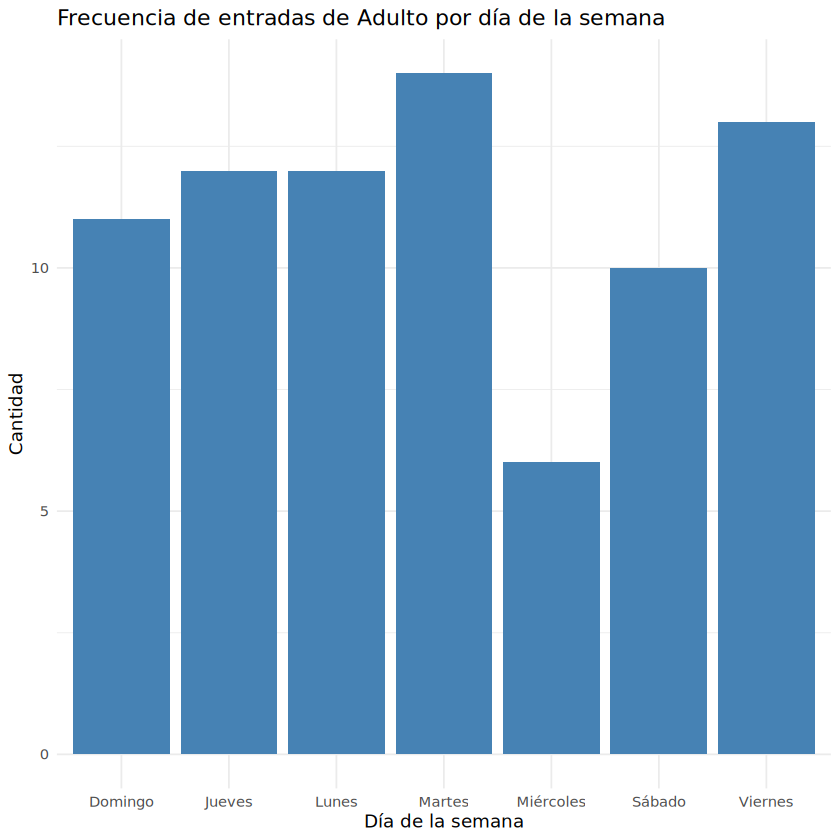

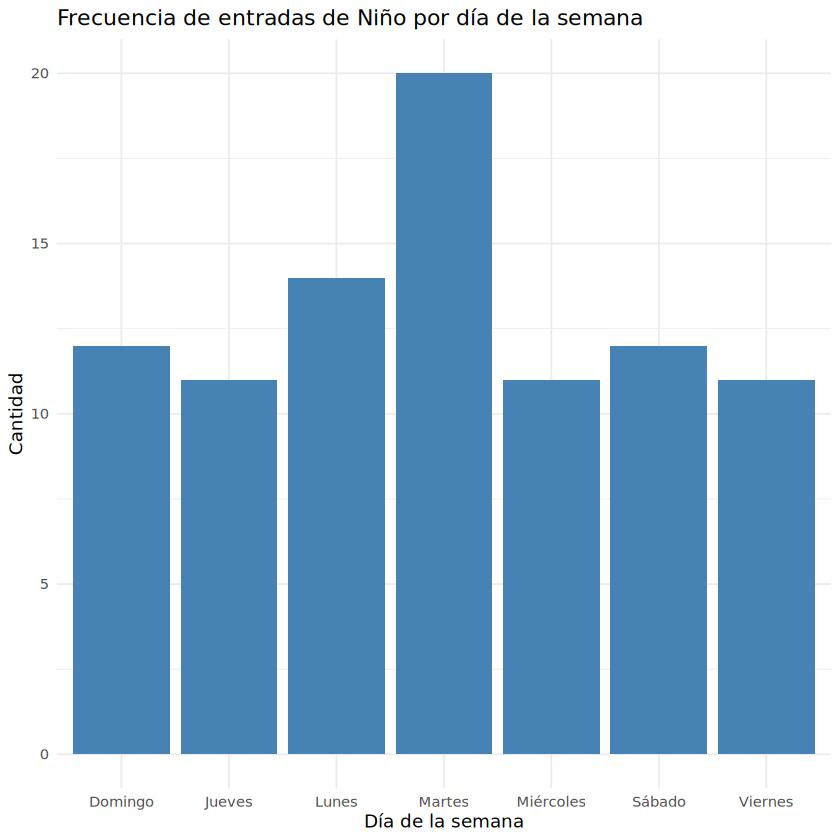

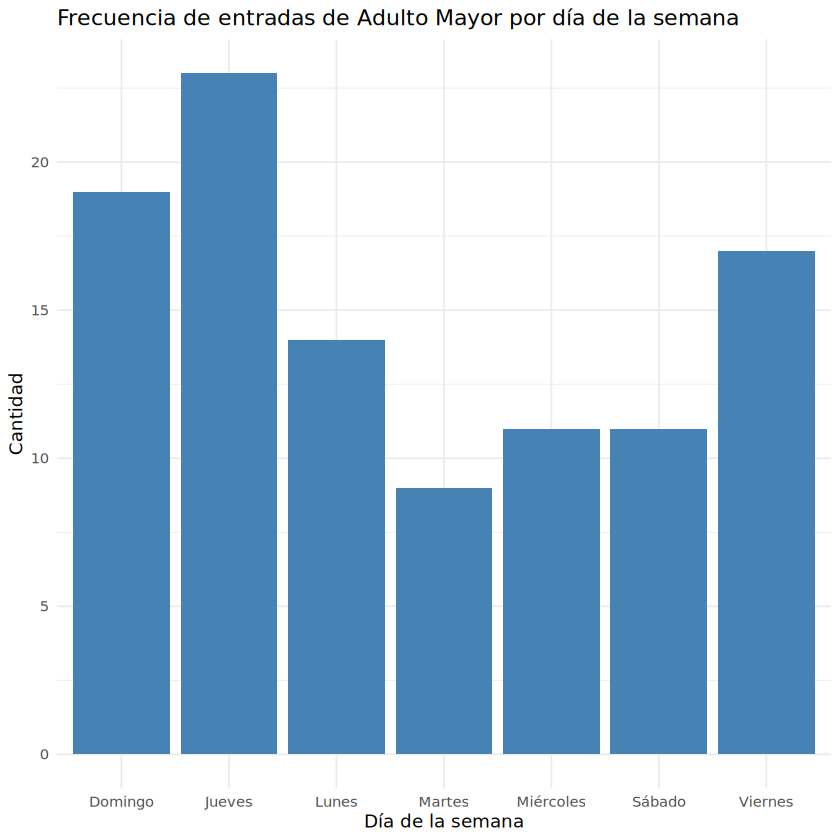

In [8]:
generar_grafico_1 <- function(dataframe, rango_etario_arg) {
  entradas_filtradas <- dataframe %>%
    filter(rango_etario == rango_etario_arg) %>%
    count(día_semana)

  ggplot(entradas_filtradas, aes(x = día_semana, y = n)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(
      title = paste("Frecuencia de entradas de", rango_etario_arg, "por día de la semana"),
      x = "Día de la semana",
      y = "Cantidad"
    ) +
    theme_minimal()
}

rango_etarios <- c("Adulto", "Niño", "Adulto Mayor")

# Generar un gráfico por rango etario
for (edad in rango_etarios) {
  print(generar_grafico_1(entradas_limpio, edad))
}

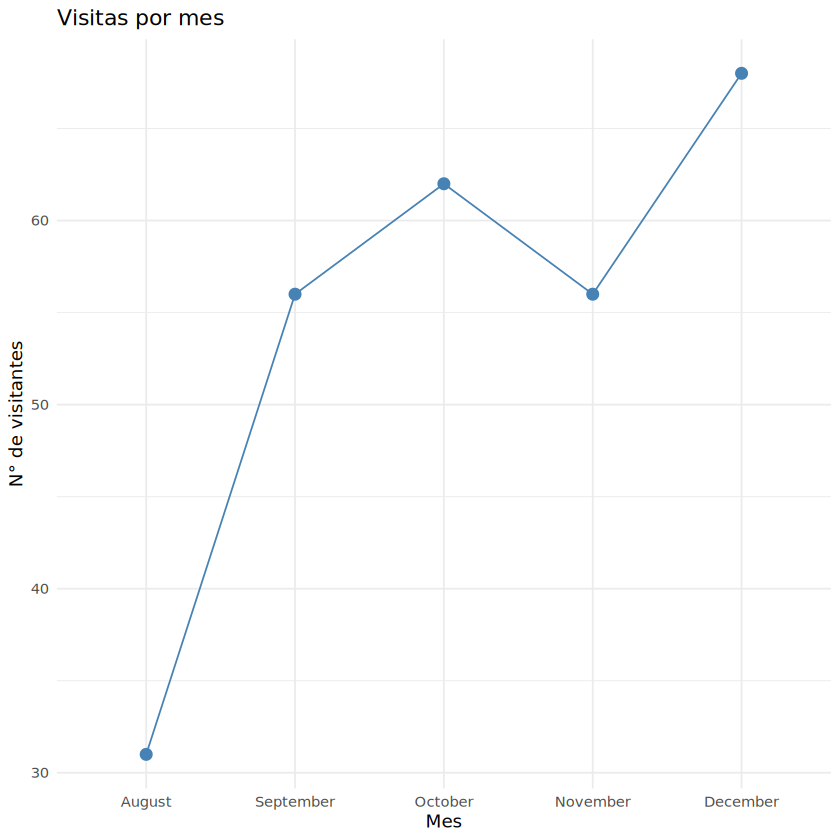

In [12]:
entradas <- entradas_limpio %>%
  mutate(
    fecha = dmy(fecha),
    mes = month(fecha),
    mes_nombre = month(fecha, label = TRUE, abbr = FALSE)
  )

# Contar visitas por mes
conteo_mes <- entradas %>%
  count(mes, mes_nombre) %>%
  arrange(mes)

# Graficar
ggplot(conteo_mes, aes(x = mes_nombre, y = n, group = 1)) +
  geom_line(color = "steelblue") +
  geom_point(size = 3, color = "steelblue") +
  labs(
    title = "Visitas por mes",
    x = "Mes",
    y = "N° de visitantes"
  ) +
  theme_minimal()